In [1]:
from keras.applications import vgg16, vgg19, ResNet50
from tensorflow.keras.utils import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
!unzip book_covers.zip

# Cargamos VGG16 pre-entrenada en ImageNet


In [43]:
# del práctico 4

modelo_escogido = 'vgg16'

if modelo_escogido == 'vgg16':
  # cargar modelo
  vgg_model = vgg16.VGG16(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()

elif modelo_escogido == 'vgg19':
  # cargar modelo
  vgg19_model = vgg19.VGG19(weights='imagenet')
  # quitar la capa de clasificacion
  feat_extractor = Model(inputs=vgg19_model.input, outputs=vgg19_model.get_layer("fc2").output)
  # vemos resumen de la arquitectura del modelo
  feat_extractor.summary()



553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

## Procesamiento de imágenes

In [44]:
imgs_path = "content/book_covers/" # ruta de carpeta con portadas

# tamaño del input layer de la red
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # cantidad de libros a recomendar

In [45]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
print("total de imagenes:",len(files))

total de imagenes: 4287


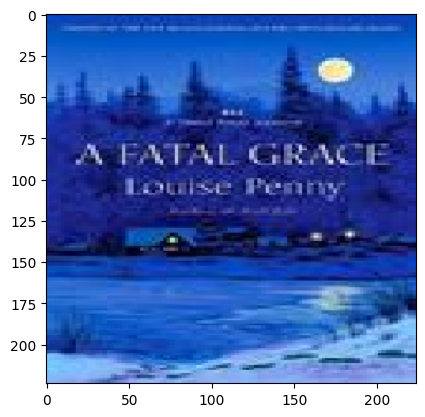

In [ ]:
# vemos imagen aleatoria
import random

idx =  random.randint(0, len(files))
original = load_img(files[idx], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()

In [46]:
# vamos a procesar cada imagen de portada, cambiándole el tamaño al del input de la red
# y luego pasarla por la red para obtener los features (vectores de 4096 dimensiones) que crea la red
importedImages = []
imgs_features = []
# procesamos por batches si no se llena la memoria
file_batch_size = 500
n_batches = len(files) // file_batch_size
print(f"No. of batches: {n_batches}")

for i, f in enumerate(files):
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

    if i > 0 and i % file_batch_size == 0:
      images = np.vstack(importedImages)
      importedImages = []

      processed_imgs = preprocess_input(images.copy())
      # obtenemos los features para cada imagen del batch con la CNN
      batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
      print(f"batch {i // file_batch_size} features extracted!")

      imgs_features.append(batch_imgs_features)

# process remaining images
if len(importedImages) > 0:
    images = np.vstack(importedImages)
    processed_imgs = preprocess_input(images.copy())
    # obtenemos los features para cada imagen del batch con la CNN
    batch_imgs_features = feat_extractor.predict(processed_imgs, batch_size=8)
    print(f"remaining images features extracted!")

    imgs_features.append(batch_imgs_features)


No. of batches: 8
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step
batch 1 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step
batch 2 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step
batch 3 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
batch 4 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step
batch 5 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step
batch 6 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
batch 7 features extracted!
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step
batch 8 features extracted!
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
remaining images features extracted!


In [47]:
# join all subarrays of imgs_features
imgs_features = np.concatenate(imgs_features, axis=0)
print(imgs_features.shape)

(4287, 4096)


In [48]:
# computa similaridad coseno entre los features de las imagenes
cosSimilarities = cosine_similarity(imgs_features)

# guardamos los resultados en un dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df #.head()

,content/book_covers/book_3544.jpg,content/book_covers/book_1693.jpg,content/book_covers/book_4024.jpg,content/book_covers/book_1028.jpg,content/book_covers/book_3223.jpg,content/book_covers/book_3199.jpg,content/book_covers/book_183.jpg,content/book_covers/book_3476.jpg,content/book_covers/book_3638.jpg,content/book_covers/book_1896.jpg,...,content/book_covers/book_1984.jpg,content/book_covers/book_611.jpg,content/book_covers/book_1997.jpg,content/book_covers/book_3831.jpg,content/book_covers/book_1364.jpg,content/book_covers/book_3258.jpg,content/book_covers/book_306.jpg,content/book_covers/book_69.jpg,content/book_covers/book_3911.jpg,content/book_covers/book_4275.jpg
content/book_covers/book_3544.jpg,1.000000,0.261806,0.599695,0.301296,0.323436,0.475254,0.542593,0.255958,0.242084,0.421367,...,0.368130,0.325274,0.420093,0.485041,0.223510,0.354615,0.387169,0.235372,0.493465,0.331092
content/book_covers/book_1693.jpg,0.261806,1.000000,0.214729,0.310460,0.360649,0.296595,0.246544,0.222674,0.213892,0.270930,...,0.209919,0.231570,0.301416,0.252213,0.231415,0.249098,0.271737,0.185357,0.262142,0.290489
content/book_covers/book_4024.jpg,0.599695,0.214729,1.000000,0.246292,0.283058,0.426683,0.484920,0.247442,0.268137,0.395129,...,0.325677,0.333898,0.344887,0.444775,0.221571,0.274255,0.385066,0.216417,0.424757,0.370396
content/book_covers/book_1028.jpg,0.301296,0.310460,0.246292,1.000000,0.259135,0.261464,0.357750,0.152989,0.202202,0.276242,...,0.221137,0.242756,0.231454,0.172061,0.293462,0.217668,0.301450,0.151465,0.283606,0.267344
content/book_covers/book_3223.jpg,0.323436,0.360649,0.283058,0.259135,1.000000,0.347073,0.304941,0.217245,0.573835,0.410880,...,0.402185,0.294956,0.428052,0.508769,0.175915,0.223736,0.377098,0.325868,0.324706,0.367592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content/book_covers/book_3258.jpg,0.354615,0.249098,0.274255,0.217668,0.223736,0.287354,0.309544,0.267625,0.190304,0.260239,...,0.349360,0.292357,0.287939,0.233008,0.357461,1.000000,0.298219,0.167249,0.270293,0.192353
content/book_covers/book_306.jpg,0.387169,0.271737,0.385066,0.301450,0.377098,0.428657,0.468692,0.311872,0.315287,0.273873,...,0.371759,0.312337,0.503965,0.442847,0.243844,0.298219,1.000000,0.267375,0.393265,0.320611
content/book_covers/book_69.jpg,0.235372,0.185357,0.216417,0.151465,0.325868,0.187883,0.232343,0.244128,0.272140,0.341008,...,0.376779,0.236046,0.263345,0.266355,0.155403,0.167249,0.267375,1.000000,0.194370,0.231531
content/book_covers/book_3911.jpg,0.493465,0.262142,0.424757,0.283606,0.324706,0.396783,0.527918,0.282854,0.327451,0.318671,...,0.386785,0.427979,0.379636,0.397993,0.232678,0.270293,0.393265,0.194370,1.000000,0.321468


In [49]:
# esta funcion imprime las portadas más similares a la dada
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("libro escogido:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("libros más similares:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("score de similaridad : ",closest_imgs_scores[i])

# esta devuelve las nb_closest_images portadas y sus similitudes del coseno
def recommend(given_index, nb_closest_images):

    closest_imgs = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_index].sort_values(ascending=False)[1:nb_closest_images+1]

    closest_imgs = closest_imgs.to_numpy()
    closest_imgs_scores = closest_imgs_scores.to_numpy()
    # creamos el array con pares (filename, score)
    recs = [(img, score) for img, score in zip(closest_imgs, closest_imgs_scores)]

    return recs

Ejemplo de portadas similares.

612
content/book_covers/book_3947.jpg
-----------------------------------------------------------------------
libro escogido:


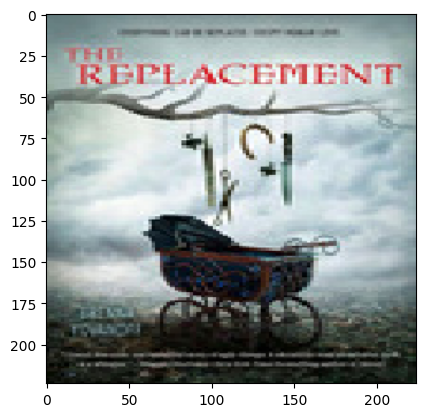

-----------------------------------------------------------------------
libros más similares:


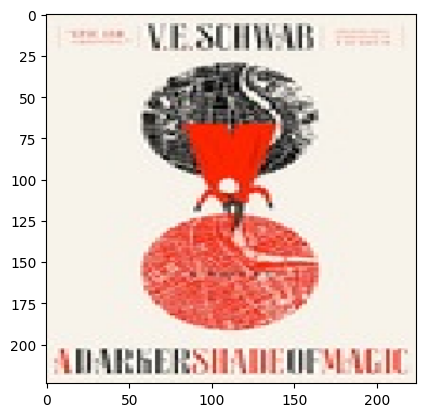

score de similaridad :  0.5363803


<ipython-input-49-de7da96d29ae>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("score de similaridad : ",closest_imgs_scores[i])


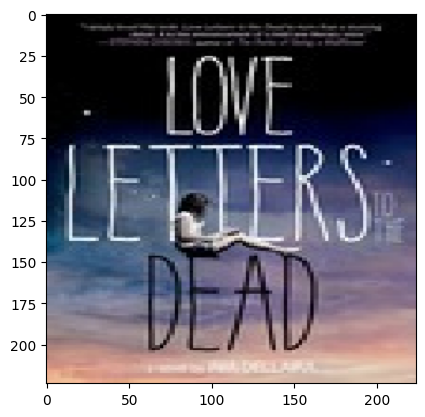

score de similaridad :  0.53039306


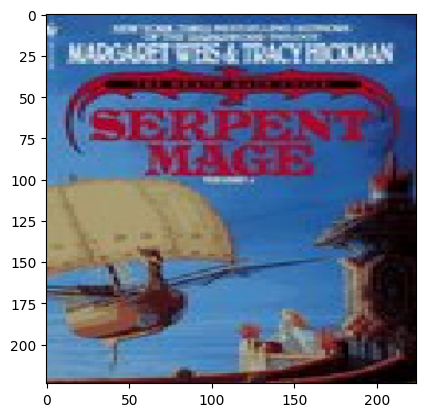

score de similaridad :  0.52823997


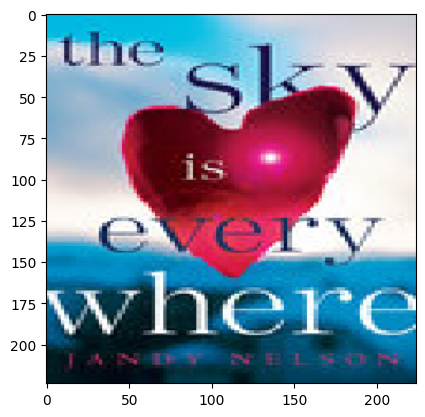

score de similaridad :  0.5186638


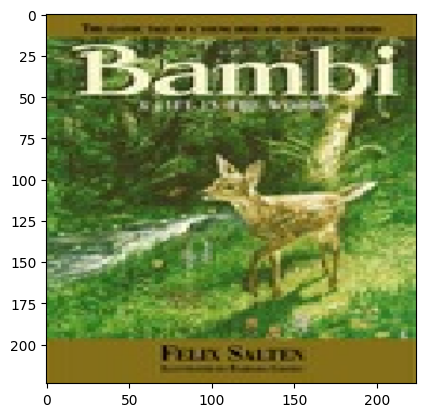

score de similaridad :  0.50900257


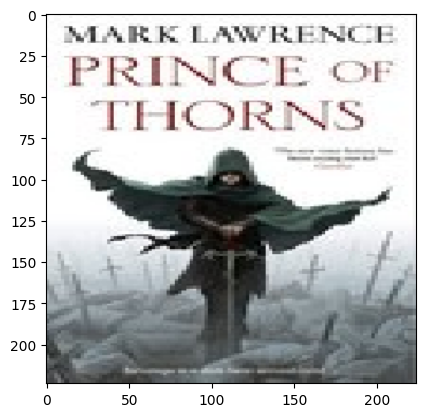

score de similaridad :  0.50569564


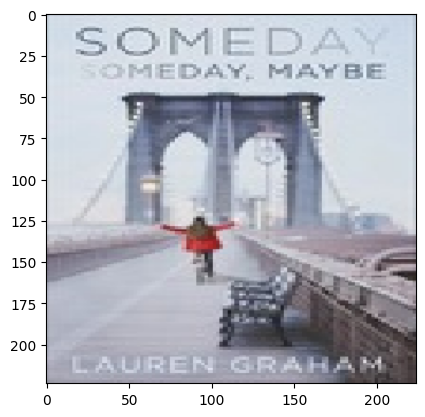

score de similaridad :  0.49469256


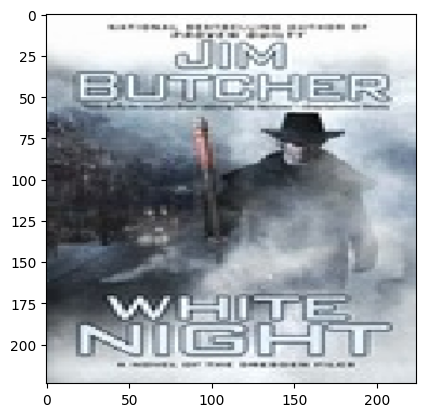

score de similaridad :  0.49220824


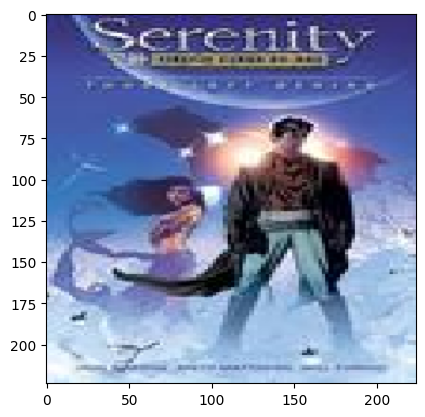

score de similaridad :  0.4910543


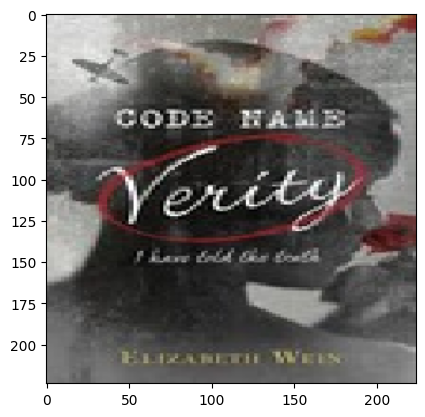

score de similaridad :  0.48933205


In [52]:
import random
idx = random.randint(0, len(files))
print(idx)
idx_recs = recommend(files[idx], nb_closest_images)
print(files[idx])
retrieve_most_similar_products(files[idx])

In [53]:
print(idx_recs[0], idx_recs[0][0])
idx_0 = int(idx_recs[0][0].strip('content/book_covers/').strip('.jpg'))
print(idx_0)

('content/book_covers/book_1323.jpg', np.float32(0.5363803)) content/book_covers/book_1323.jpg
1323


In [54]:
set([('content/book_covers/book_3006.jpg', np.float32(0.58404464)), ('content/book_covers/book_3006.jpg', np.float32(0.58404464))])

{('content/book_covers/book_3006.jpg', np.float32(0.58404464))}

# Cargar datos de libros

In [10]:
!wget https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0 -O books.csv
!wget https://www.dropbox.com/s/dqeqpsr0vdvmcy0/goodreads_past_interactions.json?dl=0 -O goodreads_past_interactions.json
!wget https://www.dropbox.com/s/rjtzhmb2zbpp30q/goodreads_test_interactions.json?dl=0 -O goodreads_test_interactions.json

--2025-06-06 03:04:54--  https://www.dropbox.com/s/57tel5zqopkssrh/books.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0 [following]
--2025-06-06 03:04:55--  https://www.dropbox.com/scl/fi/5s6xrfnu17yi34sfhmskb/books.csv?rlkey=ymzokbyqw3qq2bq5okfao9w1z&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucef8c9857105883a801788d475a.dl.dropboxusercontent.com/cd/0/inline/CrEvZ5AeK3RamqO1tyHzjmfz6znThw4W_bgjdfc-LhgQ_q6M_ZVCjLe1LEhLINn7sFt85Cd9XgtesIFSm1mfZ25D1uFMU7di5zoE3gj_EEJk9fgoYGiMPAY9M6cd-Uw9UW4GWRJnax8Pum9SUxBIkMwn/file# [following]
--2025-06-06 03:04:55--  https://ucef8c9857105883a801788d475a.dl.dropboxusercontent.com/cd/0/in

Creamos los diccionarios que convierten user_id en su índice de los arreglos y al revés.

In [55]:
df_books = pd.read_csv('books.csv', sep=',')
# dict index 2 book id and vice-versa for recommendation
idx2bookid = {i: id_ for i, id_ in enumerate(df_books.book_id)}
bookid2idx = {id_:i for i, id_ in enumerate(df_books.book_id)}

In [56]:
import json
with open("goodreads_past_interactions.json", "r") as f:
    user_interactions = json.load(f)

idx2userid = {i: id_ for i, id_ in enumerate(user_interactions.keys())}
userid2idx = {id_:i for i, id_ in enumerate(user_interactions.keys())}

In [57]:
with open("goodreads_test_interactions.json", "r") as f:
    user_interactions_test = json.load(f)

In [58]:
from scipy.sparse import coo_matrix
# convertimos diccionarios en matrices sparse (COO)
rows = []
cols = []
data = []

for user_id, book_ids in user_interactions.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows.append(int(u_id))
        cols.append(int(b_id))
        data.append(1)

max_user_id = max(rows)
max_item_id = max(cols)

# Crear matriz sparse
user_item_matrix_train = coo_matrix((data, (rows, cols)), shape=(max_user_id + 1, max_item_id + 1))

rows_test = []
cols_test = []
data_test = []

for user_id, book_ids in user_interactions_test.items():
    for book_id in book_ids:
        u_id = userid2idx[user_id]
        b_id = bookid2idx[book_id]
        rows_test.append(int(u_id))
        cols_test.append(int(b_id))
        data_test.append(1)

max_user_id = max([max_user_id] + rows_test)
max_item_id = max([max_item_id] + cols_test)

# Crear matriz sparse
user_item_matrix_test = coo_matrix((data_test, (rows_test, cols_test)), shape=(max_user_id + 1, max_item_id + 1))

# convertimos a formato CSR
user_item_matrix_train = user_item_matrix_train.tocsr()
user_item_matrix_test = user_item_matrix_test.tocsr()

print('Train shape: ' , user_item_matrix_train.shape)
print('Test shape:' , user_item_matrix_test.shape)

Train shape:  (52821, 4287)
Test shape: (52821, 4287)


In [60]:
def rec_func(users, N=10):
  recs = []
  for user in users:
    user = idx2userid[user]
    past_interactions = user_interactions[user]
    user_recs = []
    rec_tuples = set()
    # obtener libros similares para cada libro
    # con el que el usuario ha interactuado anteriormente
    for book_id in past_interactions:
      book_idx = bookid2idx[book_id]
      results = set(recommend(files[book_idx], N)) # para sacar duplicados
      rec_tuples = rec_tuples.union(results)
    rec_tuples = list(rec_tuples)
    rec_tuples.sort(key=lambda x: x[1], reverse=True) # ordenar por similaridad
    rec_tuples = rec_tuples[:N] # quedarse con las primeras n
    for rec in rec_tuples:
      ### IMPORTANTE
      # convertir el nombre del archivo al indice del libro (idx)
      # en este caso el numero del nombre del archivo
      # es el numero de la fila del dato de books.csv
      # (parece que son lo mismo)
      row = int(rec[0].strip('content/book_covers/').strip('.jpg'))
      book_id = df_books.book_id[row]
      user_recs.append(bookid2idx[book_id])
    recs.append(user_recs)
  return recs


# Evaluación

In [61]:
def custom_ranking_metrics_at_k(rec_func, train_user_items, test_user_items, K=10, show_progress=False):

    # Ensure matrices are in CSR format
    train_user_items = train_user_items.tocsr()
    test_user_items = test_user_items.tocsr()

    num_users, num_items = test_user_items.shape
    relevant = 0
    total_precision_div = 0
    total_map = 0
    total_ndcg = 0
    total_auc = 0
    total_users = 0

    # Compute cumulative gain for NDCG normalization
    cg = 1.0 / np.log2(np.arange(2, K + 2))  # Discount factor
    cg_sum = np.cumsum(cg)  # Ideal DCG normalization

    # Get users with at least one item in the test set
    users_with_test_data = np.where(np.diff(test_user_items.indptr) > 0)[0]

    # Progress bar
    #progress = tqdm.tqdm(total=len(users_with_test_data), disable=not show_progress)

    batch_size = 1000
    start_idx = 0
    #recs = []

    while start_idx < len(users_with_test_data):
        batch_users = users_with_test_data[start_idx:start_idx + batch_size]
        recommended_items = rec_func(batch_users, N=K)
        #recs.append(recommended_items)
        start_idx += batch_size

        for user_idx, user_id in enumerate(batch_users):
            test_items = set(test_user_items.indices[test_user_items.indptr[user_id]:test_user_items.indptr[user_id + 1]])

            if not test_items:
                continue  # Skip users without test data

            num_relevant = len(test_items)
            total_precision_div += min(K, num_relevant)

            ap = 0
            hit_count = 0
            auc = 0
            idcg = cg_sum[min(K, num_relevant) - 1]  # Ideal Discounted Cumulative Gain (IDCG)
            num_negative = num_items - num_relevant

            for rank, item in enumerate(recommended_items[user_idx]):
                if item in test_items:
                    relevant += 1
                    hit_count += 1
                    ap += hit_count / (rank + 1)
                    total_ndcg += cg[rank] / idcg
                else:
                    auc += hit_count  # Accumulate hits for AUC calculation

            auc += ((hit_count + num_relevant) / 2.0) * (num_negative - (K - hit_count))
            total_map += ap / min(K, num_relevant)
            total_auc += auc / (num_relevant * num_negative)
            total_users += 1

        #progress.update(len(batch_users))

    #progress.close()

    # Compute final metrics
    precision = relevant / total_precision_div if total_precision_div > 0 else 0
    mean_ap = total_map / total_users if total_users > 0 else 0
    mean_ndcg = total_ndcg / total_users if total_users > 0 else 0
    mean_auc = total_auc / total_users if total_users > 0 else 0

    return {
        "precision": precision,
        "map": mean_ap,
        "ndcg": mean_ndcg,
        "auc": mean_auc
    }

In [65]:
metrics = custom_ranking_metrics_at_k(rec_func, user_item_matrix_train, user_item_matrix_test, K=nb_closest_images)
print(metrics)

{'precision': 0.003, 'map': 0.00019444444444444446, 'ndcg': np.float64(0.0016310031981939244), 'auc': 0.49916156184241234}
